In [1]:
from sormani_potential import generate_bar_potential, generate_model
sPot, _ = generate_model(True)
_, pot_axi_noCMC = generate_bar_potential()

Updating potential...done
Updating action finder...done
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
Starting iteration #1
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
Starting iteration #2
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
Starting iteration #3
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
Starting iteration #4
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
Starting iteration #5
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done


/home/jls/.local/lib/python3.10/site-packages/agama-1.0-py3.10-linux-x86_64.egg/agama/py/pygama.py:21: RuntimeWarning: setUnits() called after creating instances of Potential and other classes may lead to incorrect scaling of input/output data in their methods
  return _setUnits(**args)  # call the setUnits(...) function from the C++ extension module


Created MW potential: total mass in stars=5.22e+10 Msun, halo=1.43e+11 Msun


In [3]:
import agama
NSC_pot = agama.Potential(type='Dehnen',mass=6.1e-3*1e10,gamma=0.71,scaleRadius=5.9e-3,axisRatioZ=0.73)

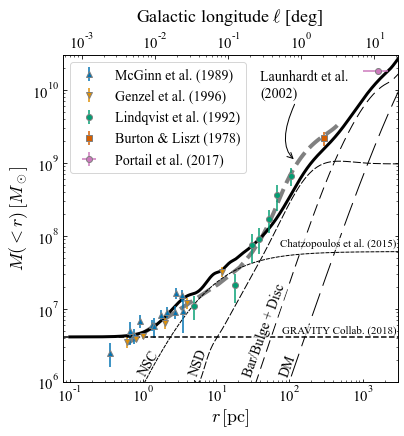

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from plotting_general import add_inner_ticks
sns.set_palette('colorblind')

from scipy.ndimage import gaussian_filter1d

lindqvist = {'r':np.array([5.,18.,31.,39.,52.,67.,104.]),
             'm':np.array([1.1,2.1,7.4,9.2,17.,36.,67.])*1e7,
             'em':np.array([0.4,0.9,3.1,3.5,6.,14.,18.])*1e7}
genzel97 = {'r':np.array([1.5,1.9,3.8,4.,11.3]),
          'm':np.array([4.5,5.7,11.2,11,30.])*1e6,
          'em':np.array([0.95,0.97,1.9,2.8,4.8])*1e6}
genzel = {'r':np.array([0.6,0.8,1.,2,4,12]),
          'm':np.array([3.5,3.85,4.2,6.4,11.9,32.])*1e6,
          'em':np.array([0.6,0.4,0.4,1.1,2,5])*1e6}
mcginn = {'r':np.array([9.,17.,19.,23.,34.,36.,45.,54.,68.,72.,85.,90.])/3600/180*np.pi*8170,
          'm':np.array([2.5,4.9,4.3,6.8,6.0,5.7,8.2,9.0,9.1,16.5,15.3,9.4])*1e6,
          'em':np.array([0.9,1.7,1,1.3,1,1.7,1.3,1.6,1.9,2.8,2.9,4.7])*1e6}
class launhardt_data(object):
    def __init__(self):
        xx = np.array([0.6,1.,3.,6., 10.,30.,60.,100.,150.,300.,500.])
        yy = np.array([3.3, 4.2,9.5,16.,21.,57.,200.,650.,1250.,2400.,3700.])*1e6
        from scipy.interpolate import UnivariateSpline
        self.u = UnivariateSpline(xx,yy)
    def __call__(self, xxx):
        return self.u(xxx)
launhardt = launhardt_data()
burton_liszt = {'r':300.,'m':2.2e9,'em':0.5e9}

plt.figure(figsize=[6.,6.])
xmax=3000.

RR = np.logspace(-4,1,1000)
NSD = np.array([sPot.enclosedMass(R)-NSC_pot.enclosedMass(R) for R in RR])
NSC = np.array([NSC_pot.enclosedMass(R) for R in RR])
DISC = np.array([pot_axi_noCMC[0].enclosedMass(R) for R in RR])
DM = np.array([pot_axi_noCMC[1].enclosedMass(R) for R in RR])

l,=plt.plot(RR*1000., NSC,color='k',lw=1,zorder=-20,ls='dashed')
l.set_dashes((4,1))
l,=plt.plot(RR[RR>0.005]*1000.,gaussian_filter1d(NSD,20)[RR>0.005],color='k',lw=1,zorder=-20,ls='dashed')
l.set_dashes((8,2))

l, = plt.plot(RR*1000.,DISC,color='k',lw=1,zorder=-20,ls='dashed')
l.set_dashes((12,6))
l, = plt.plot(RR*1000.,DM,color='k',lw=1,zorder=-20,ls='dashed')
l.set_dashes((24,8))

l,=plt.plot(RR*1000.,4.1e6+NSC+NSD+DISC+DM, color='k',lw=3,zorder=-20)

plt.errorbar(mcginn['r'],
             mcginn['m'],
             yerr=mcginn['em'],fmt='^',mec='gray',label='McGinn et al. (1989)')
plt.errorbar(genzel['r'],
             genzel['m'],
             yerr=genzel['em'],fmt='v',mec='gray',label='Genzel et al. (1996)')

plt.errorbar(lindqvist['r'],
             lindqvist['m'],
             yerr=lindqvist['em'],fmt='o',mec='gray',label='Lindqvist et al. (1992)')

plt.errorbar(burton_liszt['r'],
             burton_liszt['m'],
             burton_liszt['em'],fmt='s',mec='gray',label='Burton & Liszt (1978)')

plt.errorbar([1600.],[1.85e10],yerr=[0.07e10],xerr=[600.],fmt='o',mec='gray',label='Portail et al. (2017)')

xxx = np.linspace(0.6,500.)
plt.plot(xxx,launhardt(xxx),color='gray',lw=4,ls='dashed',zorder=-30)

plt.semilogy()
plt.semilogx()

plt.axhline(4.1e6,color='k',ls='dashed')
t=plt.annotate('GRAVITY Collab. (2018)', xy=(2900.,4.3e6),xycoords='data',ha='right',va='bottom',fontsize=11)
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='white',boxstyle='square,pad=0'))
plt.xlim(0.08,xmax)
plt.xlim(0.08,3000.)
plt.legend()
plt.xlabel(r'$r\,[\mathrm{pc}]$')
plt.ylabel(r'$M(<r)\,[M_\odot]$')
plt.ylim(1e6,)
plt.annotate('NSC',xy=(0.8,1.2e6),fontsize=14,rotation=60)
plt.annotate('NSD',xy=(4.,1.2e6),fontsize=14,rotation=70)
t=plt.annotate('Bar/Bulge + Disc',xy=(22.,1.2e6),fontsize=14,rotation=70)
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='white',boxstyle='square,pad=0'))
plt.annotate('DM',xy=(68.,1.2e6),fontsize=14,rotation=70.)
plt.annotate('Launhardt et al.\n(2002)',xy=(120.,launhardt(120.)*1.2),xytext=(40.,8e9),fontsize=14,rotation=0,
            arrowprops=dict(facecolor='black',arrowstyle="->",connectionstyle="angle3,angleA=60,angleB=-40"))
t=plt.annotate('Chatzopoulos et al. (2015)',xy=(2900.,72.*1e6),fontsize=11,ha='right')
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='white',boxstyle='square,pad=0'))
xlim = plt.gca().get_xlim()
add_inner_ticks()
plt.twiny()
plt.xlim(np.rad2deg(xlim[0]/8275), np.rad2deg(xlim[1]/8275))
plt.semilogx()
plt.xlabel(r'Galactic longitude $\ell$ [deg]', labelpad=10)
plt.ylim(1e6,3e10)

plt.gca().tick_params(axis="x",direction="in")
plt.gca().tick_params(axis="x",direction="in",which='minor')


plt.savefig('potential.pdf',bbox_inches='tight')


In [6]:
dff = make_default_galaxy_model()
xx = np.logspace(-2,1,100)
plt.plot(xx, [np.sqrt(-dff.potential.force(np.array([x,0.,0.]))[0]*x) for x in xx])
plt.ylim(0.,)
plt.xlabel(r'$R$ [kpc]')
plt.ylabel(r'$V_c$ [km/s]')
plt.semilogx()

NameError: name 'make_default_galaxy_model' is not defined